> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

I choose the european soccer data to work with, i will work with the match table and i will filter it to contain only matches from the top 5 leagues (france, england, spain, italy, germany) and that't because the poor data in the other leagues provided in the dataset and because these are the most important leagues in european soccer so we can get an overview through them to the entire data.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# remove the settingwithcopywarning
pd.options.mode.chained_assignment = None  

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

importing the 3 datasets that will be used in the analysis (will be explained how)

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_league=pd.read_csv('League.csv')
df_match=pd.read_csv('Match.csv')
df_team=pd.read_csv('Team.csv')

as explained before i will make a dataframe that only contains the top 5 leagues in europe

In [3]:
top5_leagues=[1729, 4769, 7809, 10257, 21518]
df_top5=df_match[df_match.league_id.isin(top5_leagues) == True]


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_top5.isna().sum()

id               0
country_id       0
league_id        0
season           0
stage            0
              ... 
GBD           5504
GBA           5504
BSH           5500
BSD           5500
BSA           5500
Length: 115, dtype: int64

there are a lot of missing values in more than one bitting company so they won't be useful in our analysis so we need to remove them in the next cells, also the data about the squads and possession is messy and we won't use it anyway in our analysis so we better get rid of it.

In [5]:
df_top5.drop(df_top5.columns.to_series()["home_player_X1":"possession"], axis=1, inplace=True)
df_top5.drop(df_top5.columns.to_series()["PSH":"PSA"], axis=1,inplace=True)
df_top5.drop(df_top5.columns.to_series()["GBH":"BSA"], axis=1,inplace=True)
df_top5.drop(df_top5.columns.to_series()["SJH":"SJA"], axis=1,inplace=True)
df_top5

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,8.50,1.25,4.50,10.00,1.25,4.5,10.00,1.28,5.5,12.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,11.00,1.20,5.00,11.00,1.17,5.5,12.00,1.25,6.0,13.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1.65,4.50,3.30,1.67,5.50,3.3,1.57,5.50,3.8,1.65
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.80,1.80,3.20,4.00,1.83,3.2,3.75,1.90,3.5,4.35
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,3.30,1.83,3.20,3.75,1.91,3.2,3.50,1.90,3.5,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,4.90,1.57,3.75,6.50,1.62,3.3,7.00,1.57,4.0,7.00
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,3.20,2.25,3.20,3.25,2.38,3.1,3.10,2.30,3.4,3.40
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,5.40,1.50,4.00,6.50,1.57,3.5,7.00,1.55,4.2,7.00
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,2.75,2.30,3.20,3.10,2.40,3.1,3.10,2.30,3.4,3.30


now we will check for the rest missing values and handle them

In [6]:
df_top5.isna().sum().sum()

444

In [7]:
df_top5.isna().sum()

id                   0
country_id           0
league_id            0
season               0
stage                0
date                 0
match_api_id         0
home_team_api_id     0
away_team_api_id     0
home_team_goal       0
away_team_goal       0
B365H               12
B365D               12
B365A               12
BWH                 27
BWD                 27
BWA                 27
IWH                 45
IWD                 45
IWA                 45
LBH                 17
LBD                 17
LBA                 17
WHH                 17
WHD                 17
WHA                 17
VCH                 30
VCD                 30
VCA                 30
dtype: int64

there are about 450 missing values in bitting companies but we can handle them easily by filling them with the average profit from bet in the score in each column.

In [8]:
df_top5.fillna(df_top5.mean(),inplace=True)

C:\Users\CO8F98~1.MAG\AppData\Local\Temp/ipykernel_9816/2595859036.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_top5.fillna(df_top5.mean(),inplace=True)


In [9]:
df_top5.isna().sum().sum()

0

In [10]:
df_top5.to_csv('topFive.csv')

the columns of home and away team api ids don't help us but we can use them to get the name of the clubs

In [11]:
home_list=[]
away_list=[]
for id_top in df_top5.home_team_api_id:
    for id_team, team in zip(df_team.team_api_id, df_team.team_long_name):
        if id_team==id_top:
            home_list.append(team)
df_home_names=pd.DataFrame(home_list)
for id_top in df_top5.away_team_api_id:
    for id_team, team in zip(df_team.team_api_id, df_team.team_long_name):
        if id_team==id_top:
            away_list.append(team)
df_away_names=pd.DataFrame(away_list)

we now make a new columns containing the names of the clubs and deleting the columns with the ids

In [12]:
df_home_names.shape

(14585, 1)

In [13]:
df_away_names.shape

(14585, 1)

In [14]:
df_top5['h_team_name'] = df_home_names[0].values
df_top5['a_team_name'] = df_away_names[0].values
df_top5

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,h_team_name,a_team_name
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,4.50,10.00,1.25,4.5,10.00,1.28,5.5,12.00,Manchester United,Newcastle United
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,5.00,11.00,1.17,5.5,12.00,1.25,6.0,13.00,Arsenal,West Bromwich Albion
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,3.30,1.67,5.50,3.3,1.57,5.50,3.8,1.65,Sunderland,Liverpool
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.20,4.00,1.83,3.2,3.75,1.90,3.5,4.35,West Ham United,Wigan Athletic
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,3.20,3.75,1.91,3.2,3.50,1.90,3.5,4.35,Aston Villa,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,3.75,6.50,1.62,3.3,7.00,1.57,4.0,7.00,Atlético Madrid,Valencia CF
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,3.20,3.25,2.38,3.1,3.10,2.30,3.4,3.40,Málaga CF,RC Deportivo de La Coruña
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,4.00,6.50,1.57,3.5,7.00,1.55,4.2,7.00,Athletic Club de Bilbao,Real Sporting de Gijón
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,3.20,3.10,2.40,3.1,3.10,2.30,3.4,3.30,Granada CF,Real Betis Balompié


we now delete the rest of the columns that we don't need, first we can replace the id of the league by its name and then we remove the country id since we already know the league name and drop the id columns and the stage and date because we will not perform any analysis on the date or stage.

In [15]:
df_top5.league_id.replace({1729:'England Premier League',4769:'France Ligue 1',7809:'Germany 1. Bundesliga',10257:'Italy Serie A',21518:'Spain LIGA BBVA'}, inplace=True)
df_top5.drop('country_id', inplace=True,axis=1)
df_top5.drop('home_team_api_id', inplace=True,axis=1)
df_top5.drop('away_team_api_id', inplace=True,axis=1)
df_top5.drop('id', inplace=True,axis=1)
df_top5.drop('match_api_id', inplace=True,axis=1)
df_top5.drop('stage', inplace=True,axis=1)
df_top5.drop('date', inplace=True,axis=1)
df_top5.head()

,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,...,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,h_team_name,a_team_name
1728,England Premier League,2008/2009,1,1,1.29,5.5,11.00,1.30,4.75,8.25,...,4.5,10.00,1.25,4.5,10.00,1.28,5.5,12.00,Manchester United,Newcastle United
1729,England Premier League,2008/2009,1,0,1.20,6.5,15.00,1.22,5.50,10.00,...,5.0,11.00,1.17,5.5,12.00,1.25,6.0,13.00,Arsenal,West Bromwich Albion
1730,England Premier League,2008/2009,0,1,5.50,3.6,1.67,5.00,3.35,1.67,...,3.3,1.67,5.50,3.3,1.57,5.50,3.8,1.65,Sunderland,Liverpool
1731,England Premier League,2008/2009,2,1,1.91,3.4,4.20,1.90,3.20,3.80,...,3.2,4.00,1.83,3.2,3.75,1.90,3.5,4.35,West Ham United,Wigan Athletic
1732,England Premier League,2008/2009,4,2,1.91,3.4,4.33,1.95,3.20,3.60,...,3.2,3.75,1.91,3.2,3.50,1.90,3.5,4.35,Aston Villa,Manchester City


In [16]:
df_top5.to_csv('topFive.csv')

In [17]:
df_top5=pd.read_csv('topFive.csv',index_col=0)
df_top5

,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,...,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,h_team_name,a_team_name
1728,England Premier League,2008/2009,1,1,1.29,5.50,11.00,1.30,4.75,8.25,...,4.50,10.00,1.25,4.5,10.00,1.28,5.5,12.00,Manchester United,Newcastle United
1729,England Premier League,2008/2009,1,0,1.20,6.50,15.00,1.22,5.50,10.00,...,5.00,11.00,1.17,5.5,12.00,1.25,6.0,13.00,Arsenal,West Bromwich Albion
1730,England Premier League,2008/2009,0,1,5.50,3.60,1.67,5.00,3.35,1.67,...,3.30,1.67,5.50,3.3,1.57,5.50,3.8,1.65,Sunderland,Liverpool
1731,England Premier League,2008/2009,2,1,1.91,3.40,4.20,1.90,3.20,3.80,...,3.20,4.00,1.83,3.2,3.75,1.90,3.5,4.35,West Ham United,Wigan Athletic
1732,England Premier League,2008/2009,4,2,1.91,3.40,4.33,1.95,3.20,3.60,...,3.20,3.75,1.91,3.2,3.50,1.90,3.5,4.35,Aston Villa,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,Spain LIGA BBVA,2015/2016,2,1,1.57,3.80,6.50,1.57,4.00,6.50,...,3.75,6.50,1.62,3.3,7.00,1.57,4.0,7.00,Atlético Madrid,Valencia CF
24553,Spain LIGA BBVA,2015/2016,2,0,2.25,3.25,3.40,2.35,3.10,3.10,...,3.20,3.25,2.38,3.1,3.10,2.30,3.4,3.40,Málaga CF,RC Deportivo de La Coruña
24554,Spain LIGA BBVA,2015/2016,3,0,1.53,4.00,7.00,1.55,4.00,6.50,...,4.00,6.50,1.57,3.5,7.00,1.55,4.2,7.00,Athletic Club de Bilbao,Real Sporting de Gijón
24555,Spain LIGA BBVA,2015/2016,1,1,2.30,3.25,3.25,2.35,3.25,3.00,...,3.20,3.10,2.40,3.1,3.10,2.30,3.4,3.30,Granada CF,Real Betis Balompié


we reset the index so it starts from 0 for the top 5 leagues

In [18]:
df_top5.reset_index(inplace=True)

In [19]:
df_top5.drop('index',axis=1,inplace=True)
df_top5

,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,...,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,h_team_name,a_team_name
0,England Premier League,2008/2009,1,1,1.29,5.50,11.00,1.30,4.75,8.25,...,4.50,10.00,1.25,4.5,10.00,1.28,5.5,12.00,Manchester United,Newcastle United
1,England Premier League,2008/2009,1,0,1.20,6.50,15.00,1.22,5.50,10.00,...,5.00,11.00,1.17,5.5,12.00,1.25,6.0,13.00,Arsenal,West Bromwich Albion
2,England Premier League,2008/2009,0,1,5.50,3.60,1.67,5.00,3.35,1.67,...,3.30,1.67,5.50,3.3,1.57,5.50,3.8,1.65,Sunderland,Liverpool
3,England Premier League,2008/2009,2,1,1.91,3.40,4.20,1.90,3.20,3.80,...,3.20,4.00,1.83,3.2,3.75,1.90,3.5,4.35,West Ham United,Wigan Athletic
4,England Premier League,2008/2009,4,2,1.91,3.40,4.33,1.95,3.20,3.60,...,3.20,3.75,1.91,3.2,3.50,1.90,3.5,4.35,Aston Villa,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,Spain LIGA BBVA,2015/2016,2,1,1.57,3.80,6.50,1.57,4.00,6.50,...,3.75,6.50,1.62,3.3,7.00,1.57,4.0,7.00,Atlético Madrid,Valencia CF
14581,Spain LIGA BBVA,2015/2016,2,0,2.25,3.25,3.40,2.35,3.10,3.10,...,3.20,3.25,2.38,3.1,3.10,2.30,3.4,3.40,Málaga CF,RC Deportivo de La Coruña
14582,Spain LIGA BBVA,2015/2016,3,0,1.53,4.00,7.00,1.55,4.00,6.50,...,4.00,6.50,1.57,3.5,7.00,1.55,4.2,7.00,Athletic Club de Bilbao,Real Sporting de Gijón
14583,Spain LIGA BBVA,2015/2016,1,1,2.30,3.25,3.25,2.35,3.25,3.00,...,3.20,3.10,2.40,3.1,3.10,2.30,3.4,3.30,Granada CF,Real Betis Balompié


In [20]:
df_top5.isna().sum().sum()

0

our data is now much cleaner and easier to work with we can make analysis in goals or points or the relation between the result of the matches and the bet companies expectations based in the profit for every bit

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### which bet company has closer odds to the actual game result?

this question can help us predict the result of the matches if we knew that a bet company predicts a match better than the others, we can also bet on the more profit resut if we knew that the odds of a bet company is usually wrong, however this question is based entirely on the result of the matches so it's a dependant variable question

we start by making a new column for each bet company shows their prediction for the result of the match and explain them in the points gained from each result, if there are two equal odds then we make it 2 points which isn't a true value in the results of the matches, this will help us to avoid missing values and will also return a wrong expectation when we compare it to the match result because the data from the company wasn't useful to decide

In [21]:
def company_expectations(company):
    '''
    this function takes the name of the bet company we are investigating by one parameter (company) loops through its three columns and returns a new column telling us 
    based on the company data what is the result predicted 
    '''
    company_expectations=[]
    for bh, bd, ba in zip(df_top5[f'{company}H'.upper()], df_top5[f'{company}D'.upper()], df_top5[f'{company}A'.upper()]):
        if bh<bd and bh<ba:
            company_expectations.append(3)
        elif bd<bh and bd<ba:
            company_expectations.append(1)
        elif ba<bh and ba<bd:
            company_expectations.append(0)
        else:
            company_expectations.append(2)
    df_company=pd.DataFrame(company_expectations)
    df_company.head()
    df_company=pd.DataFrame(company_expectations)
    df_company.head()
    df_top5[f'{company}_Expectations_H']=df_company[0].values
    df_top5.head()
    df_top5.drop(f'{company}H'.upper(), inplace=True,axis=1)
    df_top5.drop(f'{company}D'.upper(), inplace=True,axis=1)
    df_top5.drop(f'{company}A'.upper(), inplace=True,axis=1)

In [22]:
company_expectations('b365')
company_expectations('bw')
company_expectations('iw')
company_expectations('lb')
company_expectations('wh')
company_expectations('vc')
df_top5

,league_id,season,home_team_goal,away_team_goal,h_team_name,a_team_name,b365_Expectations_H,bw_Expectations_H,iw_Expectations_H,lb_Expectations_H,wh_Expectations_H,vc_Expectations_H
0,England Premier League,2008/2009,1,1,Manchester United,Newcastle United,3,3,3,3,3,3
1,England Premier League,2008/2009,1,0,Arsenal,West Bromwich Albion,3,3,3,3,3,3
2,England Premier League,2008/2009,0,1,Sunderland,Liverpool,0,0,0,0,0,0
3,England Premier League,2008/2009,2,1,West Ham United,Wigan Athletic,3,3,3,3,3,3
4,England Premier League,2008/2009,4,2,Aston Villa,Manchester City,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
14580,Spain LIGA BBVA,2015/2016,2,1,Atlético Madrid,Valencia CF,3,3,3,3,3,3
14581,Spain LIGA BBVA,2015/2016,2,0,Málaga CF,RC Deportivo de La Coruña,3,3,3,3,3,3
14582,Spain LIGA BBVA,2015/2016,3,0,Athletic Club de Bilbao,Real Sporting de Gijón,3,3,3,3,3,3
14583,Spain LIGA BBVA,2015/2016,1,1,Granada CF,Real Betis Balompié,3,3,3,3,3,3


we check for any missing values

In [23]:
df_top5.isna().sum().sum()

0

In [24]:
df_top5.to_csv('topFive.csv')

In [25]:
df_top5=pd.read_csv('topFive.csv',index_col=0)

now we make our analysis on the actual match result we make for the home and away team because we will use the home data in this question and the home and away data in the next one

In [26]:
home_team_points=[]
away_team_points=[]
for hp, ap in zip(df_top5.home_team_goal, df_top5.away_team_goal):
    if hp>ap:
        home_team_points.append(3)
        away_team_points.append(0)
    elif hp==ap:
        home_team_points.append(1)
        away_team_points.append(1)
    elif hp<ap:
        home_team_points.append(0)
        away_team_points.append(3)
df_home_points=pd.DataFrame(home_team_points)
df_away_points=pd.DataFrame(away_team_points)
df_top5['home_team_points']=df_home_points[0].values
df_top5['away_team_points']=df_away_points[0].values
df_top5.rename(columns={'league_id':'league_name'},inplace=True)

df_top5


,league_name,season,home_team_goal,away_team_goal,h_team_name,a_team_name,b365_Expectations_H,bw_Expectations_H,iw_Expectations_H,lb_Expectations_H,wh_Expectations_H,vc_Expectations_H,home_team_points,away_team_points
0,England Premier League,2008/2009,1,1,Manchester United,Newcastle United,3,3,3,3,3,3,1,1
1,England Premier League,2008/2009,1,0,Arsenal,West Bromwich Albion,3,3,3,3,3,3,3,0
2,England Premier League,2008/2009,0,1,Sunderland,Liverpool,0,0,0,0,0,0,0,3
3,England Premier League,2008/2009,2,1,West Ham United,Wigan Athletic,3,3,3,3,3,3,3,0
4,England Premier League,2008/2009,4,2,Aston Villa,Manchester City,3,3,3,3,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,Spain LIGA BBVA,2015/2016,2,1,Atlético Madrid,Valencia CF,3,3,3,3,3,3,3,0
14581,Spain LIGA BBVA,2015/2016,2,0,Málaga CF,RC Deportivo de La Coruña,3,3,3,3,3,3,3,0
14582,Spain LIGA BBVA,2015/2016,3,0,Athletic Club de Bilbao,Real Sporting de Gijón,3,3,3,3,3,3,3,0
14583,Spain LIGA BBVA,2015/2016,1,1,Granada CF,Real Betis Balompié,3,3,3,3,3,3,1,1


we now make a column telling us whether the expectation of the company for each match was true or false

In [27]:
def right_or_wrong(company):
    '''
    this function takes the name of the bet company we are investigating by one parameter (company) loops through its expectations column and returns a column telling us either
    the company was right on its prediction or not
    '''
    tf_company_list=[]
    for expectation, htp in zip(df_top5[f'{company}_Expectations_H'], df_top5.home_team_points):
        if expectation==htp:
            tf_company_list.append("yes")
        else:
            tf_company_list.append("no")
    df_company_and_result=pd.DataFrame(tf_company_list)
    df_top5[f'was_{company}_right']=df_company_and_result[0].values

In [28]:
right_or_wrong('b365')
right_or_wrong('bw')
right_or_wrong('iw')
right_or_wrong('lb')
right_or_wrong('wh')
right_or_wrong('vc')
df_top5

,league_name,season,home_team_goal,away_team_goal,h_team_name,a_team_name,b365_Expectations_H,bw_Expectations_H,iw_Expectations_H,lb_Expectations_H,wh_Expectations_H,vc_Expectations_H,home_team_points,away_team_points,was_b365_right,was_bw_right,was_iw_right,was_lb_right,was_wh_right,was_vc_right
0,England Premier League,2008/2009,1,1,Manchester United,Newcastle United,3,3,3,3,3,3,1,1,no,no,no,no,no,no
1,England Premier League,2008/2009,1,0,Arsenal,West Bromwich Albion,3,3,3,3,3,3,3,0,yes,yes,yes,yes,yes,yes
2,England Premier League,2008/2009,0,1,Sunderland,Liverpool,0,0,0,0,0,0,0,3,yes,yes,yes,yes,yes,yes
3,England Premier League,2008/2009,2,1,West Ham United,Wigan Athletic,3,3,3,3,3,3,3,0,yes,yes,yes,yes,yes,yes
4,England Premier League,2008/2009,4,2,Aston Villa,Manchester City,3,3,3,3,3,3,3,0,yes,yes,yes,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,Spain LIGA BBVA,2015/2016,2,1,Atlético Madrid,Valencia CF,3,3,3,3,3,3,3,0,yes,yes,yes,yes,yes,yes
14581,Spain LIGA BBVA,2015/2016,2,0,Málaga CF,RC Deportivo de La Coruña,3,3,3,3,3,3,3,0,yes,yes,yes,yes,yes,yes
14582,Spain LIGA BBVA,2015/2016,3,0,Athletic Club de Bilbao,Real Sporting de Gijón,3,3,3,3,3,3,3,0,yes,yes,yes,yes,yes,yes
14583,Spain LIGA BBVA,2015/2016,1,1,Granada CF,Real Betis Balompié,3,3,3,3,3,3,1,1,no,no,no,no,no,no


now we make the analysis on each company to see how much it was right

In [29]:
data=[['b365',df_top5.was_b365_right.value_counts()[0], df_top5.was_b365_right.value_counts()[1]],
['bw',df_top5.was_bw_right.value_counts()[0],df_top5.was_bw_right.value_counts()[1]],
['iw',df_top5.was_iw_right.value_counts()[0],df_top5.was_iw_right.value_counts()[1]],
['lb',df_top5.was_lb_right.value_counts()[0],df_top5.was_lb_right.value_counts()[1]],
['wh',df_top5.was_wh_right.value_counts()[0],df_top5.was_wh_right.value_counts()[1]],
['vc',df_top5.was_vc_right.value_counts()[0],df_top5.was_vc_right.value_counts()[1]]]

df_expectations=pd.DataFrame(data,columns=['company','right_expectation','wrong_expectation'])
df_expectations.sort_values(by='right_expectation',ascending=False,inplace=True)
df_expectations

,company,right_expectation,wrong_expectation
0,b365,7710,6875
5,vc,7685,6900
3,lb,7666,6919
1,bw,7650,6935
4,wh,7634,6951
2,iw,7542,7043


<AxesSubplot:title={'center':'the number of right ecpectation of the match result by each company'}, xlabel='the company name', ylabel='number of right predictions'>

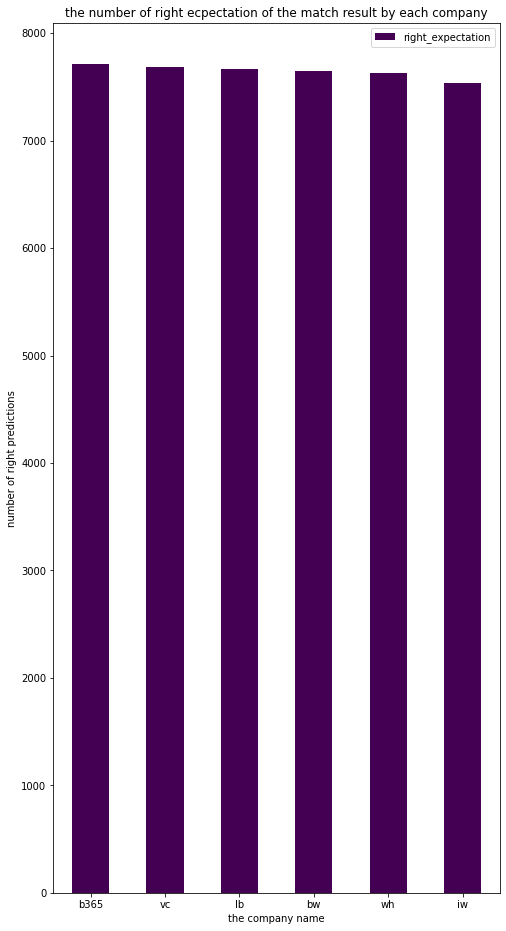

In [30]:
df_expectations.plot.bar(x='company', y='right_expectation',rot=0, figsize=(8,16), title='the number of right ecpectation of the match result by each company', xlabel='the company name',ylabel='number of right predictions', colormap='viridis')

the bar plot shows that the best company that predicted the result of the matches is b365 but the difference between the companies overall wasn't big, they all achieved more than 50% accuracy and they all didn't reach 8000 right prediction but the best oen overall was b365.

## 2d analysis

we will make analysis on the goals and points to see the relation between goals scored and recieved and the points for each team

In [31]:
df_points_and_goals_h=df_top5.groupby(df_top5.h_team_name).sum()
df_points_and_goals_h.drop(df_points_and_goals_h.columns.to_series()["b365_Expectations_H":"vc_Expectations_H"], axis=1,inplace=True)
df_points_and_goals_h.rename(columns={'home_team_goal':'goals_scored_h'},inplace=True)
df_points_and_goals_h.rename(columns={'away_team_goal':'goals_recieved_h'},inplace=True)
df_points_and_goals_h.rename(columns={'away_team_points':'other_team_points_h'},inplace=True)
df_points_and_goals_h

,goals_scored_h,goals_recieved_h,home_team_points,other_team_points_h
h_team_name,,,,
1. FC Kaiserslautern,37,47,35,56
1. FC Köln,116,139,127,148
1. FC Nürnberg,108,118,111,123
1. FSV Mainz 05,171,129,194,134
AC Ajaccio,64,77,67,85
...,...,...,...,...
West Ham United,195,174,197,170
Wigan Athletic,106,142,117,135
Wolverhampton Wanderers,62,95,61,97


In [32]:
df_points_and_goals_a=df_top5.groupby(df_top5.a_team_name).sum()
df_points_and_goals_a.drop(df_points_and_goals_a.columns.to_series()["b365_Expectations_H":"vc_Expectations_H"], axis=1,inplace=True)
df_points_and_goals_a.rename(columns={'home_team_goal':'goals_recieved_a'},inplace=True)
df_points_and_goals_a.rename(columns={'away_team_goal':'goals_scored_a'},inplace=True)
df_points_and_goals_a.rename(columns={'home_team_points':'other_team_points_a'},inplace=True)
df_points_and_goals_a

,goals_recieved_a,goals_scored_a,other_team_points_a,away_team_points
a_team_name,,,,
1. FC Kaiserslautern,58,35,61,34
1. FC Köln,172,110,176,107
1. FC Nürnberg,151,85,154,79
1. FSV Mainz 05,190,149,186,135
AC Ajaccio,107,52,111,39
...,...,...,...,...
West Ham United,209,131,240,117
Wigan Athletic,178,94,181,85
Wolverhampton Wanderers,109,56,114,42


In [33]:
dfs = [df_points_and_goals_h, df_points_and_goals_a]

df_points_and_goals = pd.concat(dfs, axis=1)
df_points_and_goals

,goals_scored_h,goals_recieved_h,home_team_points,other_team_points_h,goals_recieved_a,goals_scored_a,other_team_points_a,away_team_points
1. FC Kaiserslautern,37,47,35,56,58,35,61,34
1. FC Köln,116,139,127,148,172,110,176,107
1. FC Nürnberg,108,118,111,123,151,85,154,79
1. FSV Mainz 05,171,129,194,134,190,149,186,135
AC Ajaccio,64,77,67,85,107,52,111,39
...,...,...,...,...,...,...,...,...
West Ham United,195,174,197,170,209,131,240,117
Wigan Athletic,106,142,117,135,178,94,181,85
Wolverhampton Wanderers,62,95,61,97,109,56,114,42
Xerez Club Deportivo,20,29,22,31,37,18,39,12


In [34]:
df_points_and_goals['all_points']=df_points_and_goals['home_team_points']+df_points_and_goals['away_team_points']
df_points_and_goals['all_other_team_points']=df_points_and_goals['other_team_points_h']+df_points_and_goals['other_team_points_a']
df_points_and_goals["all_goals_scored"]=df_points_and_goals['goals_scored_h']+df_points_and_goals['goals_scored_a']
df_points_and_goals["all_goals_recieved"]=df_points_and_goals['goals_recieved_h']+df_points_and_goals['goals_recieved_a']
df_points_and_goals['the_difference'] = df_points_and_goals["all_goals_scored"] - df_points_and_goals["all_goals_recieved"]
df_points_and_goals=df_points_and_goals[['home_team_points','away_team_points','other_team_points_h','other_team_points_a','goals_scored_h','goals_scored_a','goals_recieved_h','goals_recieved_a','all_goals_scored','all_goals_recieved','the_difference', 'all_other_team_points','all_points']]
df_points_and_goals.sort_values(by=['all_points','the_difference','all_other_team_points'],inplace=True,ascending=[False,False,True])
df_points_and_goals

,home_team_points,away_team_points,other_team_points_h,other_team_points_a,goals_scored_h,goals_scored_a,goals_recieved_h,goals_recieved_a,all_goals_scored,all_goals_recieved,the_difference,all_other_team_points,all_points
FC Barcelona,405,340,39,85,495,354,101,131,849,232,617,124,745
Real Madrid CF,398,322,47,109,505,338,147,157,843,304,539,156,720
Manchester United,364,269,76,146,338,244,120,160,582,280,302,222,633
Juventus,345,288,78,126,307,236,124,126,543,250,293,204,633
FC Bayern Munich,341,282,53,96,382,271,96,115,653,211,442,149,623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eintracht Braunschweig,18,7,30,40,18,11,24,36,29,60,-31,70,25
Pescara,13,9,43,45,15,12,42,42,27,84,-57,88,22
SpVgg Greuther Fürth,4,17,43,29,10,16,36,24,26,60,-34,72,21
Córdoba CF,9,11,42,41,12,10,33,35,22,68,-46,83,20


<AxesSubplot:title={'center':'the relationship between goals scored and points'}, xlabel='number of goals scored', ylabel='number of points'>

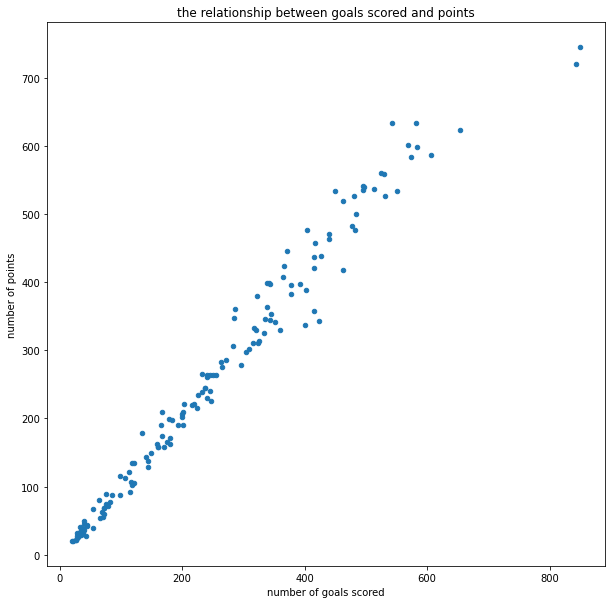

In [35]:
df_points_and_goals.plot.scatter(x='all_goals_scored', y='all_points',rot=0,figsize=(10,10),title='the relationship between goals scored and points', xlabel='number of goals scored',ylabel='number of points')

<AxesSubplot:title={'center':'the relationship between goals recieved and points won by other team'}, xlabel='number of goals recieved', ylabel='points won by the oponent'>

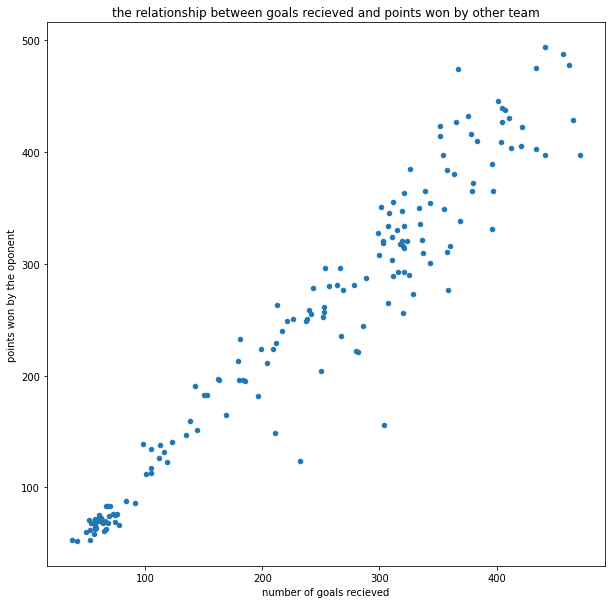

In [36]:
df_points_and_goals.plot.scatter(x='all_goals_recieved', y='all_other_team_points',rot=0,figsize=(10,10),title='the relationship between goals recieved and points won by other team', xlabel='number of goals recieved',ylabel='points won by the oponent')

<AxesSubplot:title={'center':'the relationship between goals recieved and points won by the team'}, xlabel='number of goals recieved', ylabel='points won by the team'>

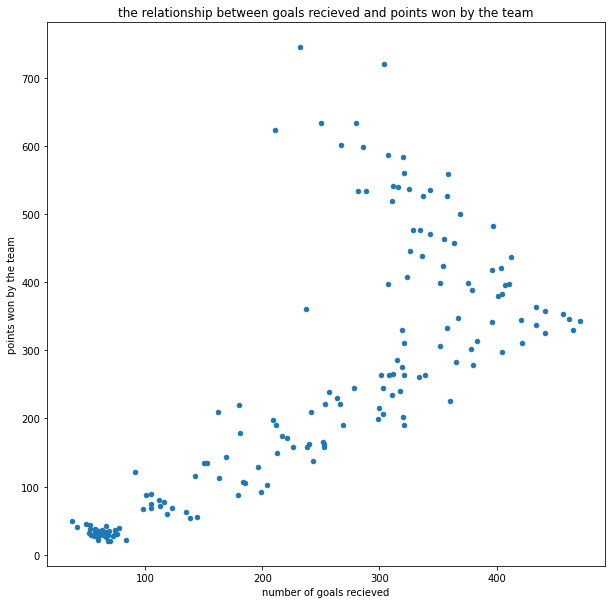

In [37]:
df_points_and_goals.plot.scatter(x='all_goals_recieved', y='all_points',rot=0,figsize=(10,10),title='the relationship between goals recieved and points won by the team', xlabel='number of goals recieved',ylabel='points won by the team')

this plot needs explain, looks like there is a positive relation between number of goals recieved and the points the team wins, but that's not accurate 100%, the teams which recieved less than 100 goals ang got less than 100 points are more likely to be sent to lower division so they didn't play many games in the 1st division, the teams which recieved more goals are more likely that they played more seasons in the 1st division so they recieved a lot of goals but they never got the 1st places, on the other hand the teams in the middle of the scatter but are higher than other teams in the same area are more likely won the league or got in the 4st places more than once so they didn't recive little goals as those who knocked out the 1st division and not as much as teams who didn't compete in the league.

so if we do the same plot but we try to cut the lower teams from the board (which are likely went to lower divisions) we can see that the best teams are going more to the left which represents that the recived more points by less goals recieved

<AxesSubplot:title={'center':'the relationship between goals recieved and points won by the team'}, xlabel='number of goals recieved', ylabel='points won by the team'>

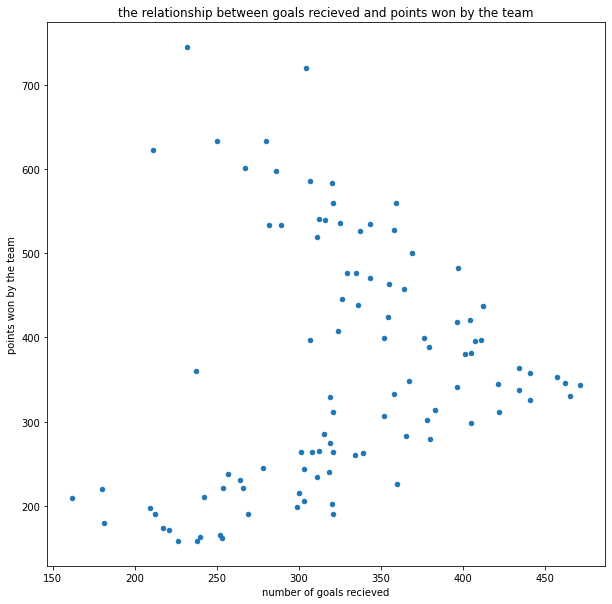

In [38]:
df_points_and_goals.iloc[0:100].plot.scatter(x='all_goals_recieved', y='all_points',rot=0,figsize=(10,10),title='the relationship between goals recieved and points won by the team', xlabel='number of goals recieved',ylabel='points won by the team')

In [39]:
df_points_and_goals.to_csv('points_and_goals')

### q what are the most teams to score goals or recieve goals in the top 5 leagues?

this question is important so it reflects the power of the defence and attack of each team, it also reflects the teams that had more consistency in scoring goals and were they better at home than away? and by how much?

we start by making two dataframes one for home matches and one for away matches to see how much every team scored and accpeted in both of them

In [40]:
df_goals = df_points_and_goals[['goals_scored_h','goals_scored_a','goals_recieved_h','goals_recieved_a','all_goals_scored','all_goals_recieved','the_difference']].copy()
df_goals.sort_values(by=['the_difference','all_goals_scored'],inplace=True,ascending=[False,False])
df_goals

,goals_scored_h,goals_scored_a,goals_recieved_h,goals_recieved_a,all_goals_scored,all_goals_recieved,the_difference
FC Barcelona,495,354,101,131,849,232,617
Real Madrid CF,505,338,147,157,843,304,539
FC Bayern Munich,382,271,96,115,653,211,442
Manchester United,338,244,120,160,582,280,302
Paris Saint-Germain,332,236,116,151,568,267,301
...,...,...,...,...,...,...,...
Rayo Vallecano,139,108,146,214,247,360,-113
UD Almería,121,81,137,184,202,321,-119
Wigan Athletic,106,94,142,178,200,320,-120
Granada CF,100,79,111,188,179,299,-120


In [41]:
df_goals.reset_index(inplace=True)
df_goals.rename(columns={'index':'team_name'},inplace=True)
df_goals

,team_name,goals_scored_h,goals_scored_a,goals_recieved_h,goals_recieved_a,all_goals_scored,all_goals_recieved,the_difference
0,FC Barcelona,495,354,101,131,849,232,617
1,Real Madrid CF,505,338,147,157,843,304,539
2,FC Bayern Munich,382,271,96,115,653,211,442
3,Manchester United,338,244,120,160,582,280,302
4,Paris Saint-Germain,332,236,116,151,568,267,301
...,...,...,...,...,...,...,...,...
159,Rayo Vallecano,139,108,146,214,247,360,-113
160,UD Almería,121,81,137,184,202,321,-119
161,Wigan Athletic,106,94,142,178,200,320,-120
162,Granada CF,100,79,111,188,179,299,-120


In [42]:
df_goals.to_csv('goals.csv')

now we can answer more than one question by this dataframe, first which team has the best difference between goals scored and goals recieved? this shows a lot of consistency and we can slice it to other questions like the team with the most goals scored at home or away or both of them.

<AxesSubplot:title={'center':'the best ten clubs in the top 5 leagues in the difference between goals scored and recieved'}, xlabel='the clubs', ylabel='the difference'>

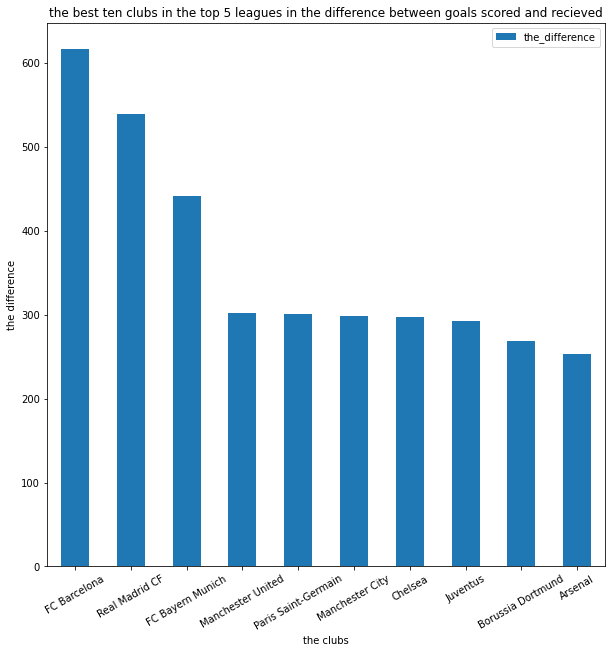

In [43]:
#the best ten team in the difference
df_goals.sort_values(by=['the_difference'],ascending=False).iloc[0:10].plot.bar(x='team_name', y='the_difference',rot=30,figsize=(10,10),title='the best ten clubs in the top 5 leagues in the difference between goals scored and recieved', xlabel='the clubs',ylabel='the difference')

<AxesSubplot:title={'center':'the best ten clubs in scoring goals in the top 5 leagues'}, xlabel='the clubs', ylabel='humber of goals scored'>

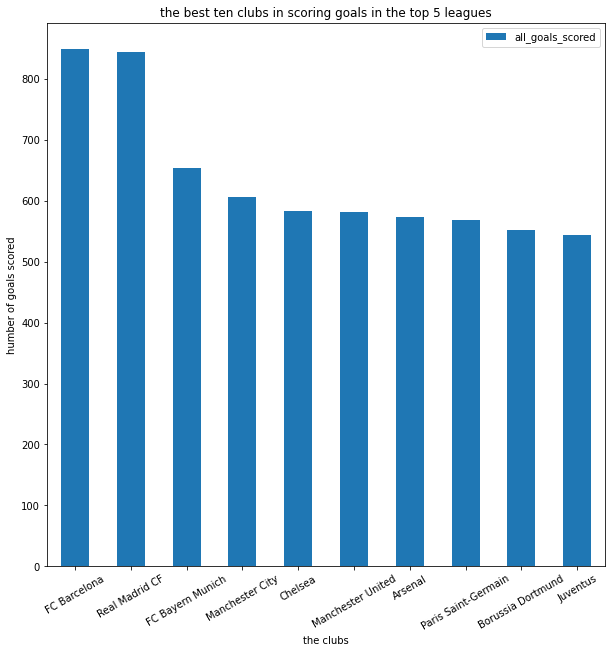

In [44]:
#the best ten team in scoring goals
df_goals.sort_values(by=['all_goals_scored'],ascending=False).iloc[0:10].plot.bar(x='team_name', y='all_goals_scored',rot=30,figsize=(10,10),title='the best ten clubs in scoring goals in the top 5 leagues', xlabel='the clubs',ylabel='humber of goals scored')

<AxesSubplot:title={'center':'the best ten clubs in scoring goals at home in the top 5 leagues'}, xlabel='the clubs', ylabel='humber of goals scored home'>

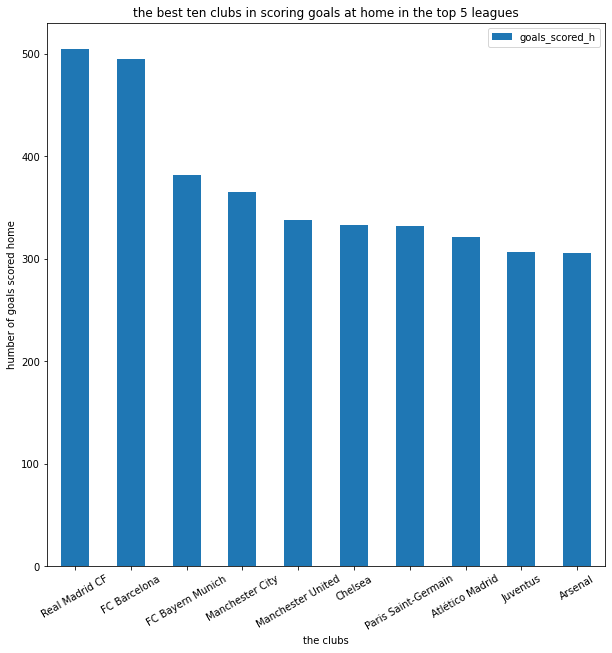

In [45]:
#the best ten team in scoring goals at home
df_goals.sort_values(by=['goals_scored_h'],ascending=False).iloc[0:10].plot.bar(x='team_name', y='goals_scored_h',rot=30,figsize=(10,10),title='the best ten clubs in scoring goals at home in the top 5 leagues', xlabel='the clubs',ylabel='humber of goals scored home')

<AxesSubplot:title={'center':'the worst ten clubs in defence in the top 5 leagues'}, xlabel='the clubs', ylabel='the difference between goals scored and received'>

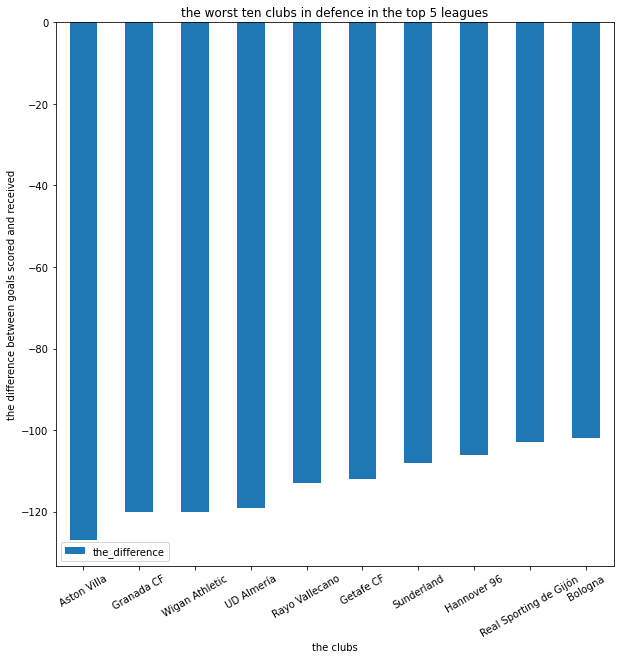

In [46]:
#the worst ten team in defence
df_goals.sort_values(by=['the_difference'],ascending=True).iloc[0:10].plot.bar(x='team_name', y='the_difference',rot=30,figsize=(10,10),title='the worst ten clubs in defence in the top 5 leagues', xlabel='the clubs',ylabel='the difference between goals scored and received')

we should note that these are the teams that most likely played many seasons in the league and didn't go to lower division but had a bad defence.

now this one is a bit tricky we would like to know the best defencing team but unfortunatly there are teams that only played at the first division one time so they will be considered as if they are better in defence than teams that played in the first division all the years so we will ignore the first 60 teams in case they were gone to lower divisions to get more accurate analysis.

### q which teams got more points in this time period?

this question helps us to compare the power of each team from different leagues and see their consistency and ability to win

In [47]:
df_points = df_points_and_goals[['home_team_points','away_team_points','other_team_points_h','other_team_points_a','all_other_team_points','all_points']].copy()
df_points.sort_values(by=['all_points','all_other_team_points'],inplace=True,ascending=[False,True])
df_points

,home_team_points,away_team_points,other_team_points_h,other_team_points_a,all_other_team_points,all_points
FC Barcelona,405,340,39,85,124,745
Real Madrid CF,398,322,47,109,156,720
Juventus,345,288,78,126,204,633
Manchester United,364,269,76,146,222,633
FC Bayern Munich,341,282,53,96,149,623
...,...,...,...,...,...,...
Eintracht Braunschweig,18,7,30,40,70,25
Pescara,13,9,43,45,88,22
SpVgg Greuther Fürth,4,17,43,29,72,21
Córdoba CF,9,11,42,41,83,20


In [48]:
df_points.reset_index(inplace=True)
df_points.rename(columns={'index':'team_name'},inplace=True)

In [49]:
df_points

,team_name,home_team_points,away_team_points,other_team_points_h,other_team_points_a,all_other_team_points,all_points
0,FC Barcelona,405,340,39,85,124,745
1,Real Madrid CF,398,322,47,109,156,720
2,Juventus,345,288,78,126,204,633
3,Manchester United,364,269,76,146,222,633
4,FC Bayern Munich,341,282,53,96,149,623
...,...,...,...,...,...,...,...
159,Eintracht Braunschweig,18,7,30,40,70,25
160,Pescara,13,9,43,45,88,22
161,SpVgg Greuther Fürth,4,17,43,29,72,21
162,Córdoba CF,9,11,42,41,83,20


In [50]:
df_points.to_csv('points.csv')

now let's analyse our data

<AxesSubplot:title={'center':'the best 20 clubs in the top 5 leagues'}, xlabel='the clubs', ylabel='the points'>

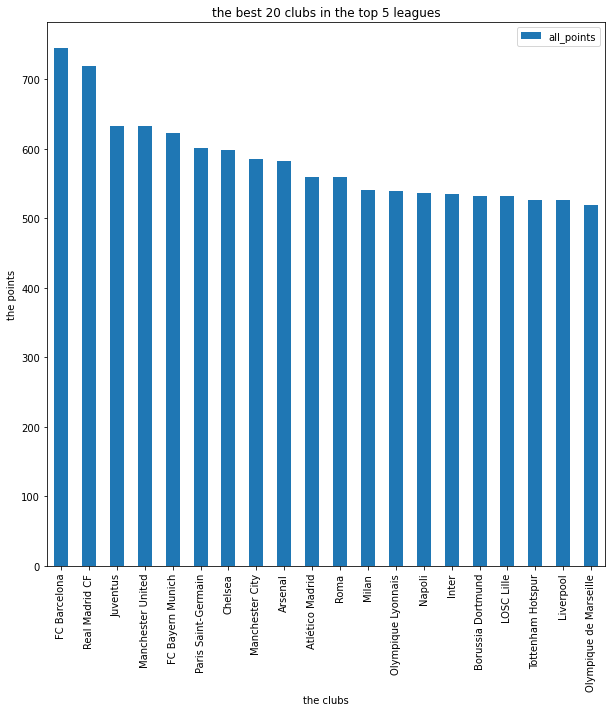

In [51]:
# if we are in a one league what are the first 20 teams?
df_points.sort_values(by=['all_points'],ascending=False).iloc[0:20].plot.bar(x='team_name', y='all_points',rot=90,figsize=(10,10),title='the best 20 clubs in the top 5 leagues', xlabel='the clubs',ylabel='the points')

as explained in the goals received analysis we can't do our analysis on the last 20 teams in points so we will ignore the last 65.

<AxesSubplot:title={'center':'the easiest 20 oponents in the top 5 leagues'}, xlabel='the clubs', ylabel='the points of the other team'>

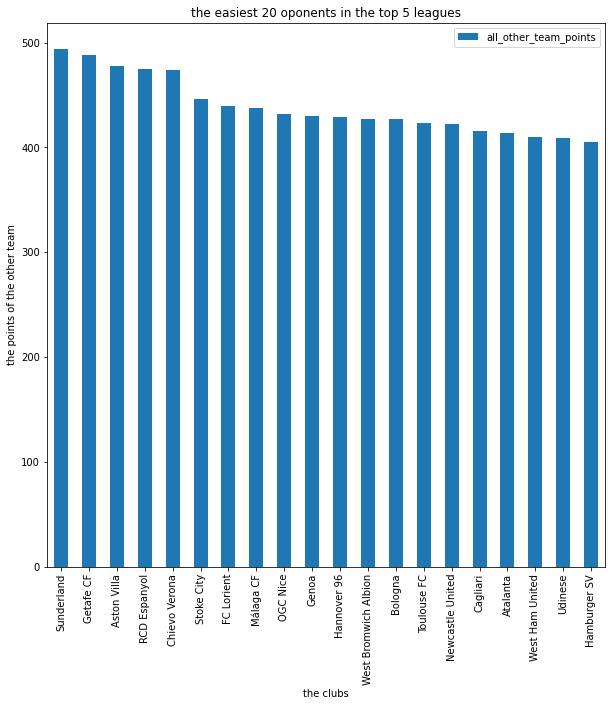

In [52]:
# which teams got less points
df_points.sort_values(by=['all_other_team_points'],ascending=False).iloc[0:20].plot.bar(x='team_name', y='all_other_team_points',rot=90,figsize=(10,10),title='the easiest 20 oponents in the top 5 leagues', xlabel='the clubs',ylabel='the points of the other team')

### conclusion

we can summarize our findings that the bet companies we analyzed are almost the same in the odds of winning or losing but the most predictable one is bet365 and that reflects that winning from it is a little bit harder than the others but if we want to predict the result it's our best option.

we can see from the 2d analysis that there is a positive relation between number of goals scored and number of points collected by the team and also a positive relation between 
goals recieved and points won by the oponent which reflects the truth that the teams which score more get more points and this explains why barcelona and real madrid are in top of both the points and the goals scored

and on terms of goals we can see that barcelona, real madrid are the most powerful two teams in europe in terms of attacking and scoring bet there are more powerful teams in defence than them.

and on the part of points also we can see that barcelona and real madrid are the best in this time period, we can also notice that fc bayern and juventus and manchester united are also close to each other and they come after barcelona and real madrid, we can also see that the most powerful league is in england because there are 6 teams in the first 20 teams who got more points from england

### limitations

this data is only valid for the top 5 leagues in europe and it also helps us to know the teams which continued in high level over this time.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1